# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MCD3100 - Ciencia de Datos Geoespaciales
**Pontificia Universidad Católica de Chile**<br>
**Magister en Ciencia de Datos**<br>

## 1.Leer un DEM (ahora con `rioxarray`).

En este ejemplo, utilizaremos `rioxarray` para leer, visualizar y manipular datos raster.<br>

Para aprender sobre las características y ventajas de `xarray`, revisar la siguiente documentación:

https://docs.xarray.dev/en/stable/getting-started-guide/why-xarray.html


In [146]:
import rioxarray as rxr
dem = rxr.open_rasterio('s34_w072_1arc_v3.tif')
dem

<xarray.DataArray (band: 1, y: 3601, x: 3601)>
[12967201 values with dtype=int16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -72.0 -72.0 -72.0 -72.0 ... -71.0 -71.0 -71.0 -71.0
  * y            (y) float64 -33.0 -33.0 -33.0 -33.0 ... -34.0 -34.0 -34.0 -34.0
    spatial_ref  int64 0
Attributes: (12/27)
    AREA_OR_POINT:                Point
    DTED_CompilationDate:         2
    DTED_DataEdition:             2
    DTED_DigitizingSystem:        SRTM      
    DTED_HorizontalAccuracy:      9
    DTED_HorizontalDatum:         WGS84
    ...                           ...
    DTED_VerticalAccuracy_UHL:    7
    DTED_VerticalDatum:           E96
    _FillValue:                   -32767
    scale_factor:                 1.0
    add_offset:                   0.0
    units:                        m

In [113]:
#La matriz de datos:
dem.data

array([[[   0,    0,    0, ..., 1167, 1164, 1162],
        [   0,    0,    0, ..., 1169, 1164, 1160],
        [   0,    0,    0, ..., 1170, 1163, 1158],
        ...,
        [   0,    0,    0, ...,  647,  661,  664],
        [   0,    0,    0, ...,  644,  650,  655],
        [   0,    0,    0, ...,  637,  641,  645]]], dtype=int16)

In [114]:
# View the Coordinate Reference System (CRS) & spatial extent
print("The CRS for this data is:", dem.rio.crs)
print("The spatial extent is:", dem.rio.bounds())

The CRS for this data is: EPSG:4326
The spatial extent is: (-72.00013888888888, -34.0001388888889, -70.99986111111112, -32.999861111111116)


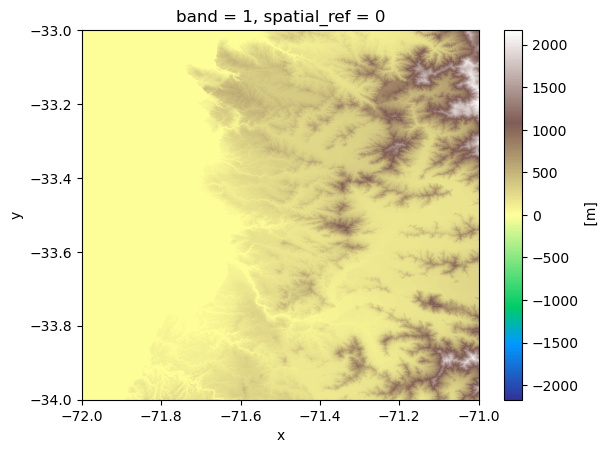

In [115]:
dem.plot(cmap='terrain');

## 2. Sampleo con `xarray`

In [156]:
import random
import numpy as np

#puntos aleatorios
x=random.choices(np.arange(-72,-71,0.01), k=10)
y=random.choices(np.arange(-34,-33,0.01), k=10)


In [157]:
da = dem.sel(x=x, y=y, method="nearest")
da

<xarray.DataArray (band: 1, y: 10, x: 10)>
[100 values with dtype=int16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -71.45 -71.68 -71.61 ... -71.89 -71.68 -71.32
  * y            (y) float64 -33.68 -33.94 -33.05 -33.21 ... -33.7 -33.03 -33.15
    spatial_ref  int64 0
Attributes: (12/27)
    AREA_OR_POINT:                Point
    DTED_CompilationDate:         2
    DTED_DataEdition:             2
    DTED_DigitizingSystem:        SRTM      
    DTED_HorizontalAccuracy:      9
    DTED_HorizontalDatum:         WGS84
    ...                           ...
    DTED_VerticalAccuracy_UHL:    7
    DTED_VerticalDatum:           E96
    _FillValue:                   -32767
    scale_factor:                 1.0
    add_offset:                   0.0
    units:                        m

## 3. Reproyección.

In [158]:
import numpy as np
nodata=-9999
dem_utm = dem.rio.reproject(32719,nodata=nodata)
dem_utm

<xarray.DataArray (band: 1, y: 3981, x: 3363)>
array([[[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]]], dtype=int16)
Coordinates:
  * x            (x) float64 2.197e+05 2.197e+05 ... 3.152e+05 3.153e+05
  * y            (y) float64 6.347e+06 6.347e+06 ... 6.234e+06 6.234e+06
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes: (12/27)
    AREA_OR_POINT:                Point
    DTED_CompilationDate:         2
    DTED_DataEdition:             2
    DTED_DigitizingSystem:        SRTM      
    DTED_HorizontalAccuracy:      9
    DTED_HorizontalDatum:         WGS84
    ...                           ...
    DTED_VerticalAccuracy_UHL:    7
    DTED_VerticalDatum:           E96
    scale_factor:                 1.0
    add_offset:                   0.0
    units:                        m
    _FillValue:                   -32767

In [159]:
dem_utm = dem_utm.where(dem_utm != nodata)


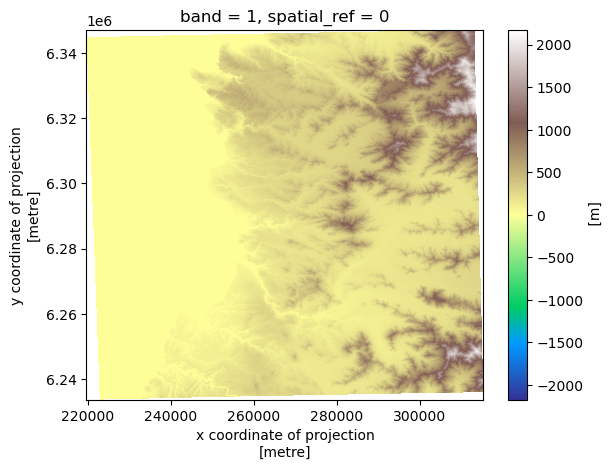

In [160]:
dem_utm.plot(cmap='terrain');#vmin=0

## 4. Estadísticas zonales.

Además de evaluar un raster en putos específicos, también es usual que nos interese calcular estadísticas sobre una región o geometría específica. Por ejemplo, para nuestro DEM de ejemplo, podemos calculas las elevaciones mínimas, media y máxima para una o varias comunas.
La geometría de las comunas de la Región de Valparaíso está dada por la cartografía censal que hemos utilizado en actividades anteriores.

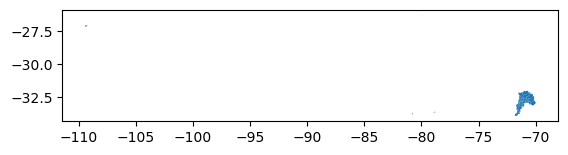

In [208]:
import geopandas as gpd
comuna=gpd.read_file('Comunal.shp')
comuna.plot();

<Axes: >

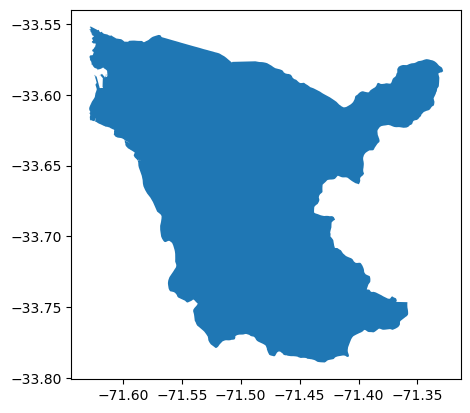

In [142]:
com=comuna[comuna['N_COMUNA']=='SAN ANTONIO']
com.plot()

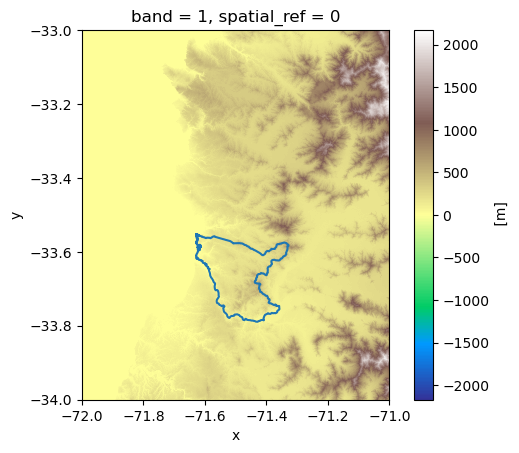

In [161]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)

dem.plot(cmap='terrain',ax=ax);
com.boundary.plot(ax=ax);

In [162]:
dem_clip=dem.rio.clip(com.to_crs(4326).geometry)
dem_clip

<xarray.DataArray (band: 1, y: 854, x: 1082)>
array([[[-32767, -32767, -32767, ..., -32767, -32767, -32767],
        [-32767, -32767, -32767, ..., -32767, -32767, -32767],
        [-32767, -32767,      5, ..., -32767, -32767, -32767],
        ...,
        [-32767, -32767, -32767, ..., -32767, -32767, -32767],
        [-32767, -32767, -32767, ..., -32767, -32767, -32767],
        [-32767, -32767, -32767, ..., -32767, -32767, -32767]]],
      dtype=int16)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -71.63 -71.63 -71.63 ... -71.33 -71.33 -71.33
  * y            (y) float64 -33.55 -33.55 -33.55 ... -33.79 -33.79 -33.79
    spatial_ref  int64 0
Attributes: (12/27)
    AREA_OR_POINT:                Point
    DTED_CompilationDate:         2
    DTED_DataEdition:             2
    DTED_DigitizingSystem:        SRTM      
    DTED_HorizontalAccuracy:      9
    DTED_HorizontalDatum:         WGS84
    ...                           ...
    DTED_VerticalAccuracy_UHL:    7
    DTED_VerticalDatum:           E96
    scale_factor:                 1.0
    add_offset:                   0.0
    units:                        m
    _FillValue:                   -32767

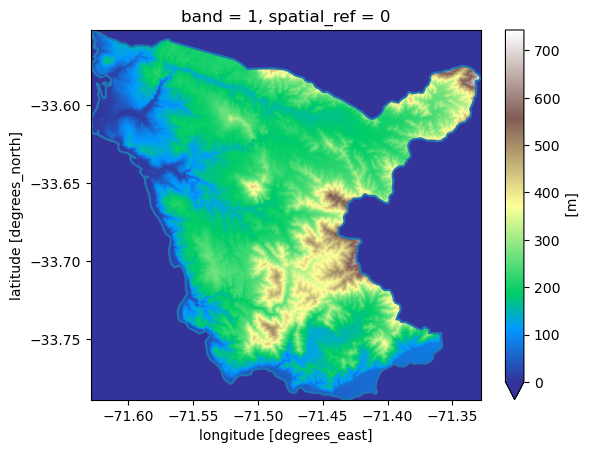

In [163]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)

dem_clip.plot(cmap='terrain',ax=ax,vmin=0);
com.boundary.plot(ax=ax);

In [178]:
dem_clip

<xarray.DataArray (band: 1, y: 854, x: 1082)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan,  5., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -71.63 -71.63 -71.63 ... -71.33 -71.33 -71.33
  * y            (y) float64 -33.55 -33.55 -33.55 ... -33.79 -33.79 -33.79
    spatial_ref  int64 0
Attributes: (12/27)
    AREA_OR_POINT:                Point
    DTED_CompilationDate:         2
    DTED_DataEdition:             2
    DTED_DigitizingSystem:        SRTM      
    DTED_HorizontalAccuracy:      9
    DTED_HorizontalDatum:         WGS84
    ...                           ...
    DTED_VerticalAccuracy_UHL:    7
    DTED_VerticalDatum:           E96
    scale_factor:                 1.0
    add_offset:                   0.0
    units:                        m
    _FillValue:                   -32767

In [179]:
dem_clip = dem_clip.where(dem_clip != -32767)
dem_clip

<xarray.DataArray (band: 1, y: 854, x: 1082)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan,  5., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -71.63 -71.63 -71.63 ... -71.33 -71.33 -71.33
  * y            (y) float64 -33.55 -33.55 -33.55 ... -33.79 -33.79 -33.79
    spatial_ref  int64 0
Attributes: (12/27)
    AREA_OR_POINT:                Point
    DTED_CompilationDate:         2
    DTED_DataEdition:             2
    DTED_DigitizingSystem:        SRTM      
    DTED_HorizontalAccuracy:      9
    DTED_HorizontalDatum:         WGS84
    ...                           ...
    DTED_VerticalAccuracy_UHL:    7
    DTED_VerticalDatum:           E96
    scale_factor:                 1.0
    add_offset:                   0.0
    units:                        m
    _FillValue:                   -32767

In [181]:
dem_clip.min().values,dem_clip.max().values, dem_clip.mean().values

(array(-14.), array(743.), array(212.93494, dtype=float32))

## 5. Estadísticas zonales para un conjunto de polígonos

Si queremos repetir el cáluclo de esta´disticas zonales para un conjunto de geometrías, puede ser conveniente usar la función `zonal_stats` de la librería `rasterstats`: https://pythonhosted.org/rasterstats/

In [219]:
from rasterstats import zonal_stats

zs=zonal_stats('Comunal.shp','s34_w072_1arc_v3.tif')
zs

[{'min': -1.0, 'max': 530.0, 'mean': 214.82200143101684, 'count': 110411},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'count': 0, 'min': None, 'max': None, 'mean': None},
 {'min': -14.0, 'max': 743.0, 'mean': 212.93492842226084, 'count': 501832},
 {'min': 0.0, 'max': 587

Convertimos los resultados en un DataFrame y combinamos con el GeoDataFrame de comunas para ordenar los resultados:

In [220]:
zs=pd.DataFrame(zs)
zs

,min,max,mean,count
0,-1.0,530.0,214.822001,110411
1,NaN,NaN,NaN,0
2,NaN,NaN,NaN,0
3,NaN,NaN,NaN,0
4,NaN,NaN,NaN,0
5,NaN,NaN,NaN,0
6,NaN,NaN,NaN,0
7,NaN,NaN,NaN,0
8,NaN,NaN,NaN,0
9,NaN,NaN,NaN,0


In [223]:
com_zs=comuna.join(zs)

(-34.0, -32.8)

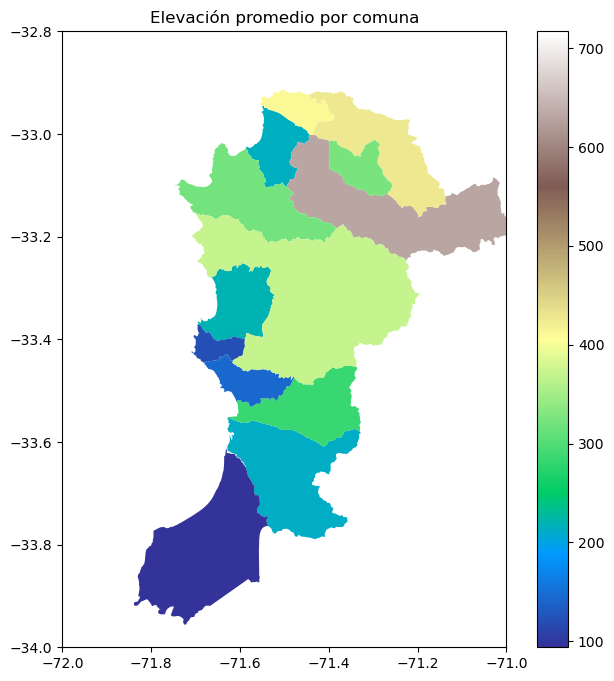

In [231]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
com_zs.plot(column='mean',cmap='terrain',ax=ax,legend=True)
ax.set_title('Elevación promedio por comuna')
ax.set_xlim(-72,-71)
ax.set_ylim(-34,-32.8)
